Here I used heart disease dataset and tried different **hyperparameter tuning**:
* By hand
* By using **RandomizedSearchCV**
* By using **GridSearchCV**

I observerd how different evaluation metrices(like **accuracy, precision, recall, f1 score**) changes with each tuning method. You can see the bar graph showing the comparision between them at the end of this notebook.

In [18]:
import pandas as pd

In [19]:
df=pd.read_csv("heart-disease.csv")

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Hyperparameter tuning by hand

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [22]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're goint to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [23]:
def evaluate_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}%")
    print(f"Recall:{recall:.2f}%")
    print(f"F1 score:{f1:.2f}%")
    return metric_dict
    

In [24]:
import numpy as np

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [26]:
np.random.seed(42)

# shuffle the data
df_shuffled=df.sample(frac=1)

#split into X & y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#split the data into train, validation and test sets
train_split=round(0.7*len(df_shuffled))
valid_split=round(train_split+0.15*len(df_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]
len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [27]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#make baseline predictions
y_preds=clf.predict(X_valid)

In [29]:
#evaluate the classifer on validation set
baseline_metics=evaluate_preds(y_valid,y_preds)
baseline_metics

Acc:82.22%
Precision:0.81%
Recall:0.88%
F1 score:0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [30]:
np.random.seed(42)

#create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

#make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc:82.22%
Precision:0.84%
Recall:0.84%
F1 score:0.84%


In [31]:
clf_3=RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train,y_train)
y_preds_3=clf_3.predict(X_valid)
clf_3_metrics=evaluate_preds(y_valid,y_preds_3)

Acc:82.22%
Precision:0.81%
Recall:0.88%
F1 score:0.85%


## Hyperparameter tuning with RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
grid={
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}

np.random.seed(42)

#split into X and y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

#instantiate RanRandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#SETUP RandRandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)

#fit the RandomRandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [34]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [36]:
#make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

#evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc:83.61%
Precision:0.83%
Recall:0.92%
F1 score:0.87%


## Hyperparameter tuning with GridSearchCV

In [37]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [38]:
grid_2={
    "n_estimators":[10,500,1000],
    "max_depth":[5,20],
    "max_features":["sqrt"],
    "min_samples_split":[2],
    "min_samples_leaf":[1,4]
}

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split into X and y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

#instantiate RanRandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#SETUP RandRandomizedSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

#fit the RandomRandomizedSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4], 'min_samples_split': [2],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [43]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}

In [44]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:81.97%
Precision:0.82%
Recall:0.89%
F1 score:0.86%


## Lets compare our different models metrics.


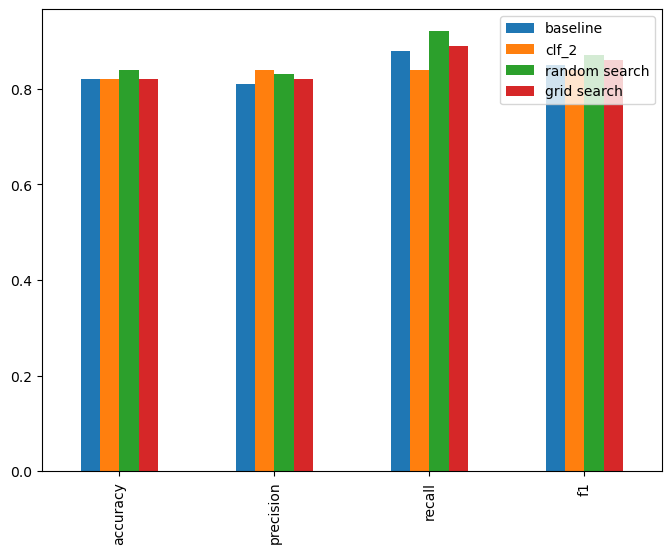

In [49]:
compare_metrics=pd.DataFrame({
    "baseline":baseline_metics,
    "clf_2":clf_2_metrics,
    "random search":rs_metrics,
    "grid search":gs_metrics
})
compare_metrics.plot.bar(figsize=(8,6));